In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import random
from PIL import Image
import os
from tqdm import tqdm

from utils.utils_DataVisualization import check_images, show_images, compute_rgb_stats, compare_rgb_means_per_class

path_to_data_folder = "../data"
path_to_cinic10 = f"{path_to_data_folder}/CINIC-10"

In [2]:
df = pd.read_csv(f"{path_to_data_folder}/cinic10_domain_labels.csv")
df.head()

,split,category,filename,source,full_path
0,train,airplane,cifar10-train-10008.png,CIFAR-10,train/airplane/cifar10-train-10008.png
1,train,airplane,cifar10-train-10010.png,CIFAR-10,train/airplane/cifar10-train-10010.png
2,train,airplane,cifar10-train-10020.png,CIFAR-10,train/airplane/cifar10-train-10020.png
3,train,airplane,cifar10-train-10024.png,CIFAR-10,train/airplane/cifar10-train-10024.png
4,train,airplane,cifar10-train-10050.png,CIFAR-10,train/airplane/cifar10-train-10050.png


In [3]:
print("Split Distribution:")
print(df["split"].value_counts().sort_index())
print()
print("Class (Category) Distribution:")
print(df["category"].value_counts().sort_index())
print()
print("Source Domain Distribution:")
print(df["source"].value_counts())

Split Distribution:
split
test     90000
train    90000
valid    90000
Name: count, dtype: int64

Class (Category) Distribution:
category
airplane      27000
automobile    27000
bird          27000
cat           27000
deer          27000
dog           27000
frog          27000
horse         27000
ship          27000
truck         27000
Name: count, dtype: int64

Source Domain Distribution:
source
ImageNet    210000
CIFAR-10     60000
Name: count, dtype: int64


In [4]:
print("Class-wise Domain Breakdown:")
pd.crosstab(df['category'], df['source'])

Class-wise Domain Breakdown:


source,CIFAR-10,ImageNet
category,,
airplane,6000,21000
automobile,6000,21000
bird,6000,21000
cat,6000,21000
deer,6000,21000
dog,6000,21000
frog,6000,21000
horse,6000,21000
ship,6000,21000


In [5]:
brokenImagePaths = check_images(df, path_to_cinic10)

Checking if any images in the dataset are broken with img.verify()


100%|█████████████████████████████████| 270000/270000 [00:30<00:00, 8942.16it/s]

No broken Images


In [6]:
print("Duplicates:", df["full_path"].duplicated().sum())

Duplicates: 0


In [7]:
compare_rgb_means_per_class(df, path_to_cinic10, n=2000) # Maximum value is 21000. Higher values to not change anything due to not having more pictures per class per source

Class        CIFAR-10 (R,G,B)               ImageNet (R,G,B)               Difference (R,G,B)            
----------------------------------------------------------------------------------------------------
airplane     (0.527, 0.56, 0.589)           (0.506, 0.542, 0.57)           (-0.021, -0.018, -0.019)      
automobile   (0.472, 0.456, 0.448)          (0.45, 0.437, 0.42)            (-0.022, -0.018, -0.029)      
bird         (0.483, 0.488, 0.421)          (0.469, 0.478, 0.421)          (-0.014, -0.01, -0.0)         
cat          (0.498, 0.459, 0.418)          (0.465, 0.434, 0.372)          (-0.033, -0.025, -0.046)      
deer         (0.471, 0.466, 0.379)          (0.477, 0.468, 0.384)          (0.006, 0.001, 0.005)         
dog          (0.505, 0.467, 0.419)          (0.49, 0.464, 0.4)             (-0.014, -0.004, -0.019)      
frog         (0.472, 0.44, 0.345)           (0.455, 0.425, 0.321)          (-0.017, -0.014, -0.024)      
horse        (0.503, 0.48, 0.416)           (0.484,

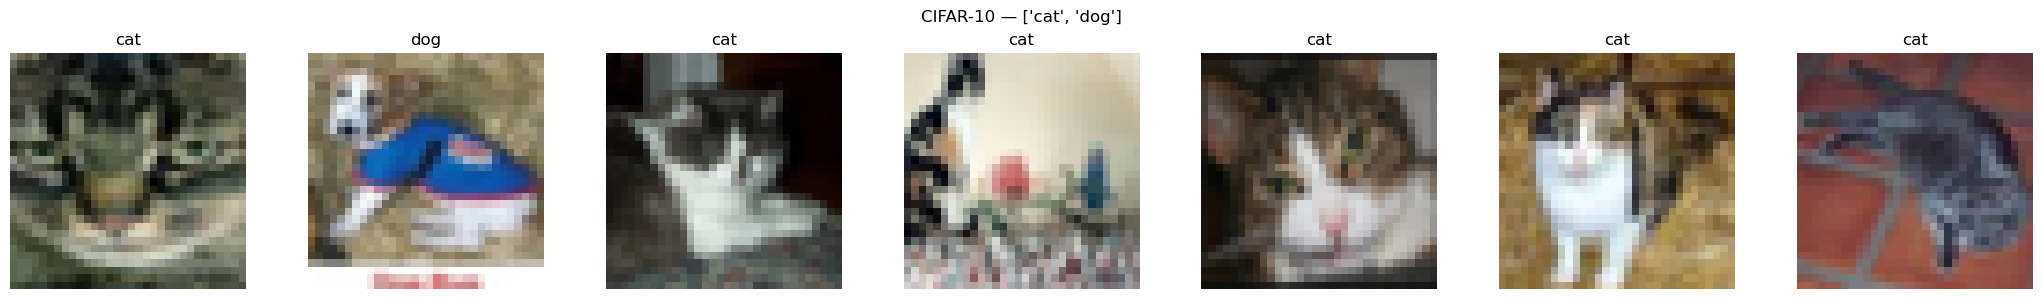

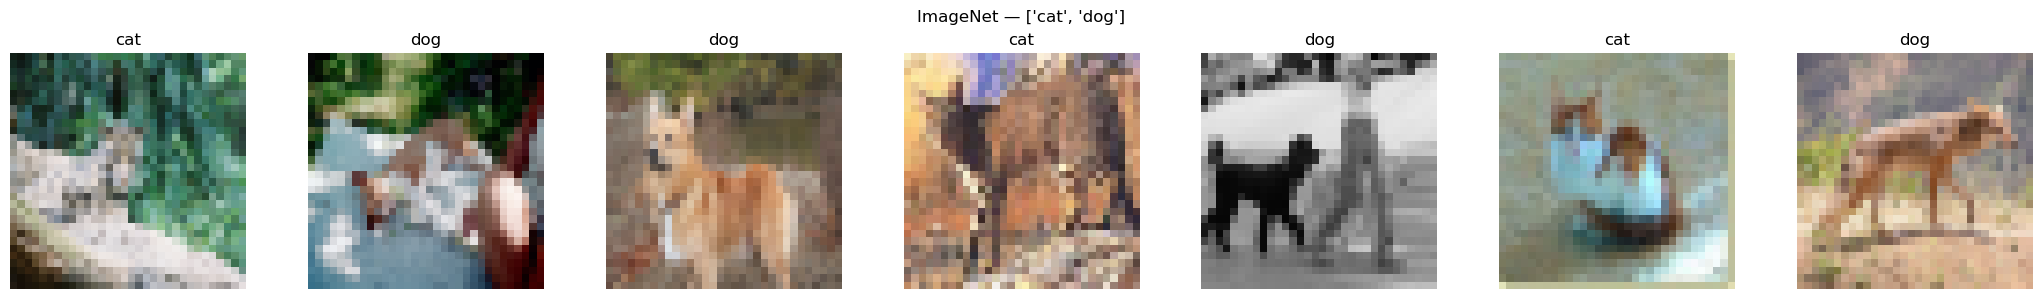

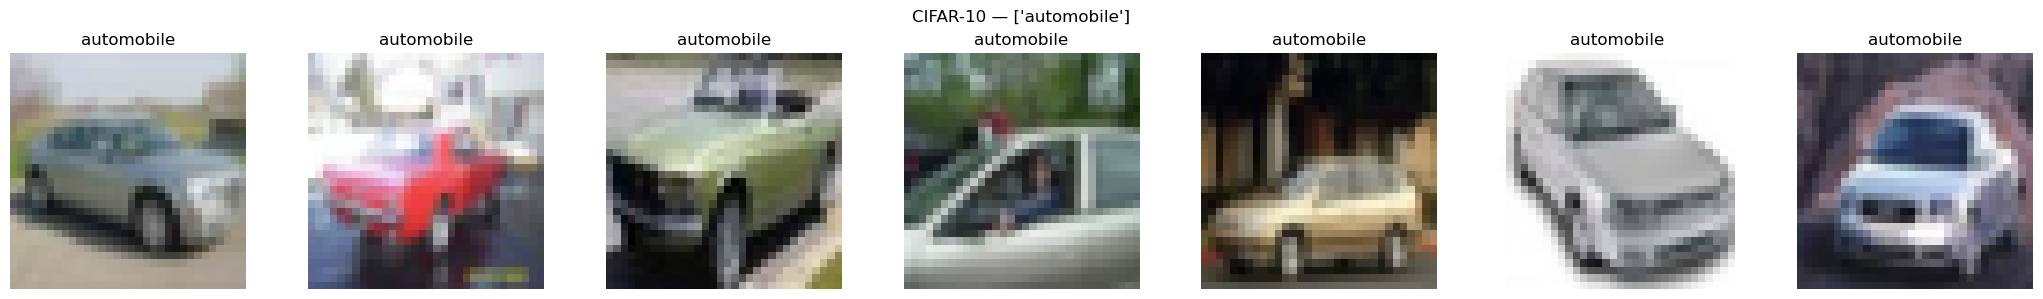

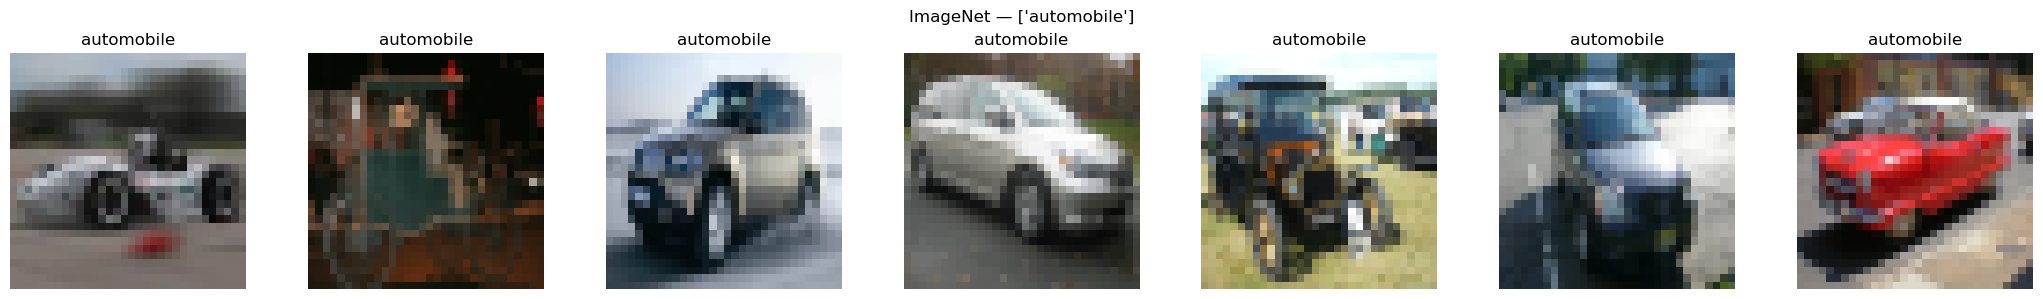

In [8]:
# Show 7 random CIFAR-10 images from ["cat", "dog"]
show_images(df, path_to_cinic10, label="CIFAR-10", n=7, random_state=42, class_filter=["cat", "dog"])

# Show 7 random ImageNet images from ["cat", "dog"]
show_images(df, path_to_cinic10, label="ImageNet", n=7, random_state=42, class_filter=["cat", "dog"])

# Show 7 random CIFAR-10 images from ["automobile"]
show_images(df, path_to_cinic10, label="CIFAR-10", n=7, random_state=42, class_filter= "automobile")

# Show 7 random ImageNet images from ["automobile"]
show_images(df, path_to_cinic10, label="ImageNet", n=7, random_state=42, class_filter= "automobile")

